In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "../Dataset/merged_flight_train_with_holidays.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Check dataset shape and column names
print(df.shape)
print(df.columns)

       Country Month (YYYY-MM)  Arrivals  Departures  No of holidays
0    Indonesia         2019-11    343394      343364               1
1     Malaysia         2019-11    294208      276244               1
2  Philippines         2019-11    125603      134604               4
3     Thailand         2019-11    268198      267407               0
4      Vietnam         2019-11    115505      116564               0
(627, 5)
Index(['Country', 'Month (YYYY-MM)', 'Arrivals', 'Departures',
       'No of holidays'],
      dtype='object')


Check for Missing Values

In [2]:
print(df.isnull().sum())

Country            0
Month (YYYY-MM)    0
Arrivals           0
Departures         0
No of holidays     0
dtype: int64


Explore Data Types

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          627 non-null    object
 1   Month (YYYY-MM)  627 non-null    object
 2   Arrivals         627 non-null    int64 
 3   Departures       627 non-null    int64 
 4   No of holidays   627 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 24.6+ KB
None


Basic Statistics

In [4]:
print(df.describe())

            Arrivals     Departures  No of holidays
count     627.000000     627.000000      627.000000
mean   154534.162679  152311.038278        1.357257
std    101650.527390   99610.514883        1.583650
min     14520.000000   13317.000000        0.000000
25%     62114.500000   64301.500000        0.000000
50%    125956.000000  125447.000000        1.000000
75%    254403.500000  244444.500000        2.000000
max    374571.000000  397449.000000       11.000000


Convert Month (YYYY-MM) to Date Format

In [17]:
df['Month (YYYY-MM)'] = pd.to_datetime(df['Month (YYYY-MM)'])

Plot Passenger Arrivals Over Time

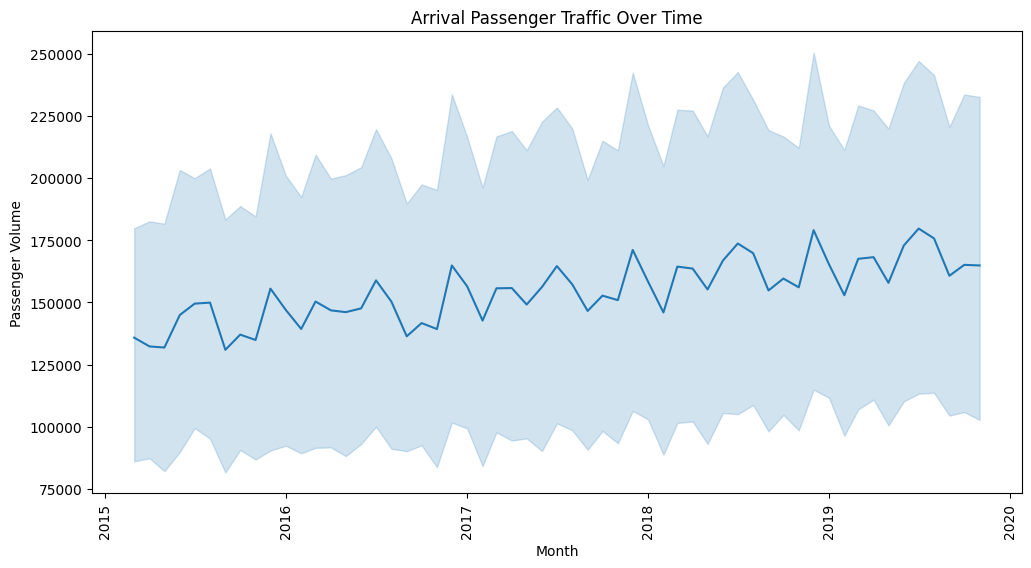

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Month (YYYY-MM)'], y=df['Arrivals'])
plt.title('Passenger Arrivals Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=90)
plt.show()

Compare Arrivals & Departures

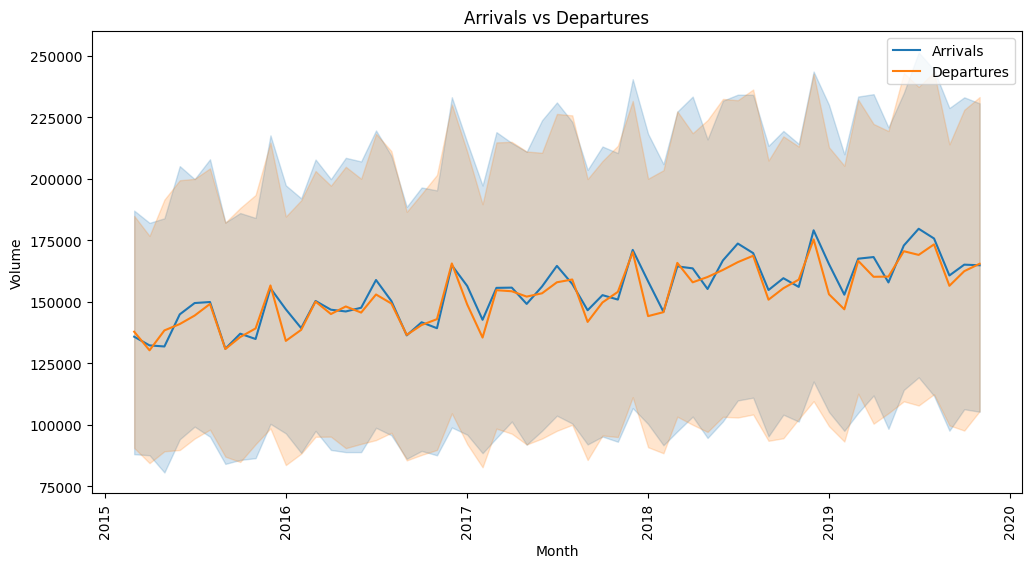

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Month (YYYY-MM)'], y=df['Arrivals'], label="Arrivals")
sns.lineplot(x=df['Month (YYYY-MM)'], y=df['Departures'], label="Departures")
plt.title('Arrivals vs Departures Over Time')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Impact of Public Holidays on Passenger Volume - arrival

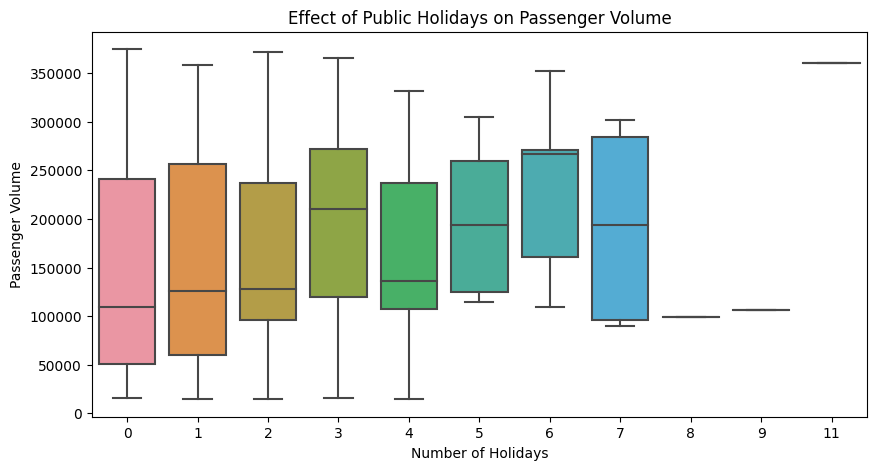

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['No of holidays'], y=df['Arrivals'])
plt.title('Effect of Public Holidays on Passenger Volume')
plt.xlabel('Number of Holidays')
plt.ylabel('Passenger Volume')
plt.show()

Impact of Public Holidays on Passenger Volume - departure

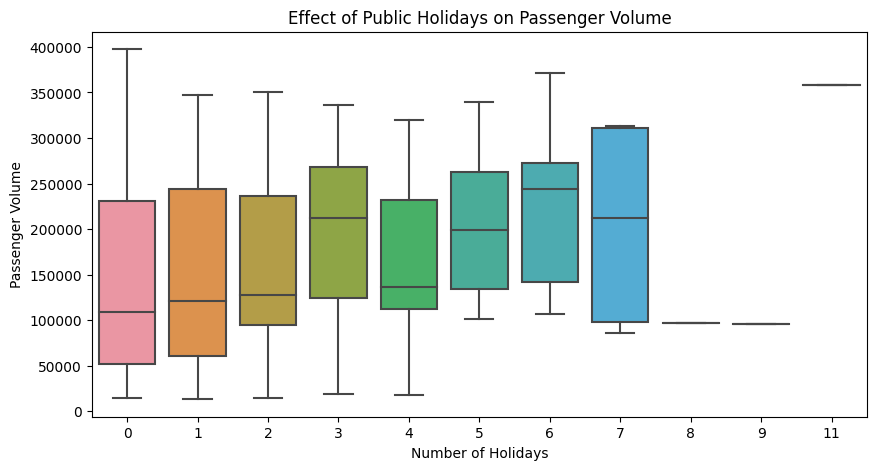

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['No of holidays'], y=df['Departures'])
plt.title('Effect of Public Holidays on Passenger Volume')
plt.xlabel('Number of Holidays')
plt.ylabel('Passenger Volume')
plt.show()

Passenger Arrivals by Country Over Time

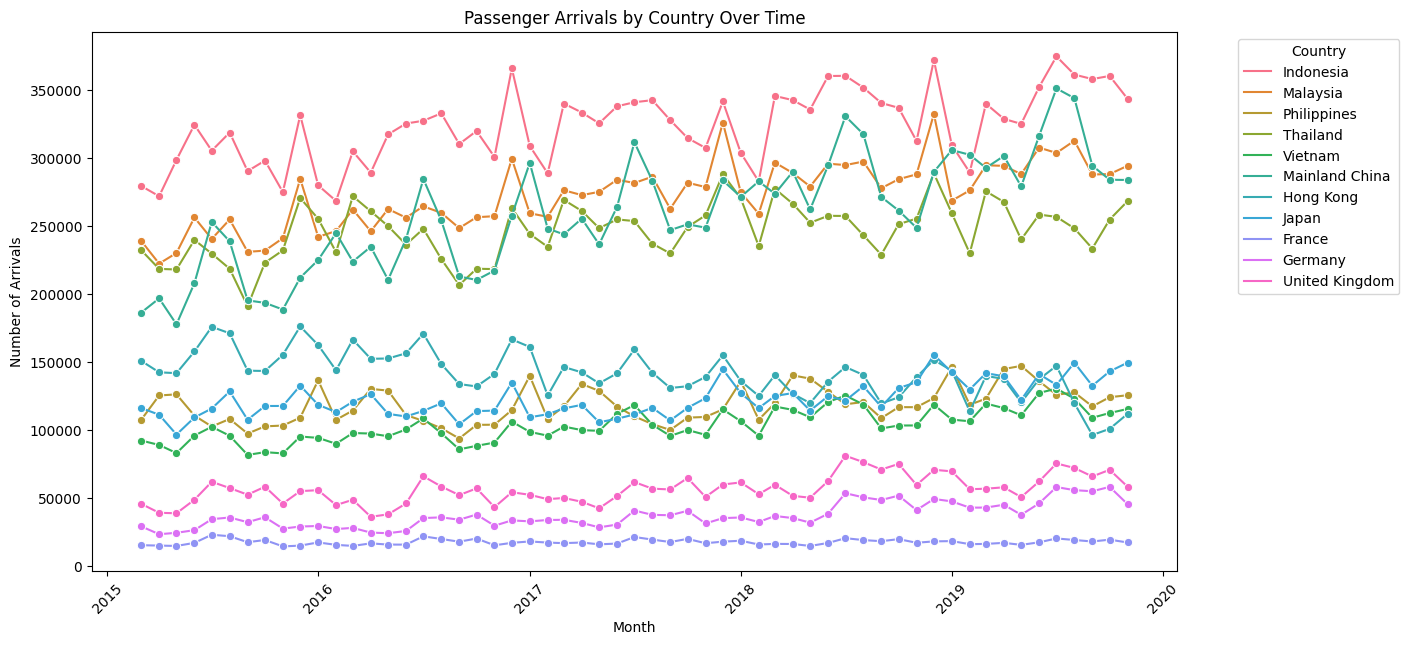

In [24]:
plt.figure(figsize=(14,7))
sns.lineplot(x=df['Month (YYYY-MM)'], y=df['Arrivals'], hue=df['Country'], marker="o")
plt.title('Passenger Arrivals by Country Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Passenger Departures by Country Over Time

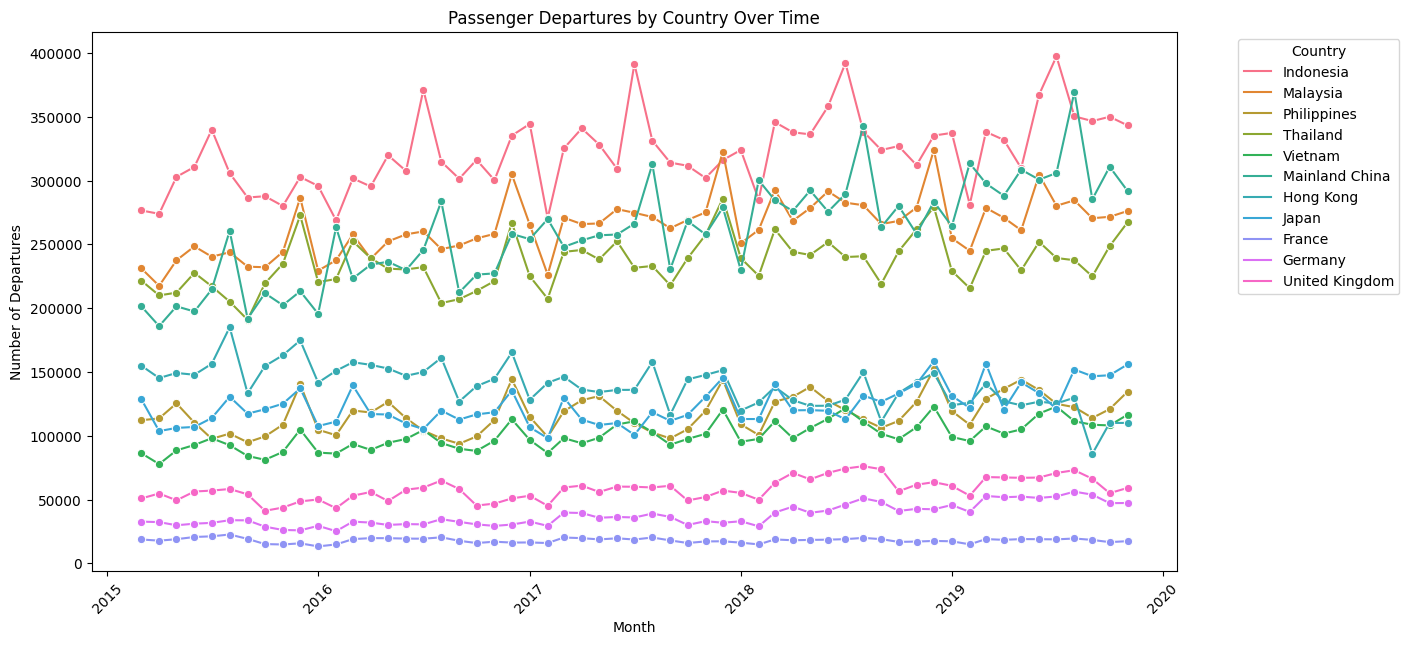

In [25]:
plt.figure(figsize=(14,7))
sns.lineplot(x=df['Month (YYYY-MM)'], y=df['Departures'], hue=df['Country'], marker="o")
plt.title('Passenger Departures by Country Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Departures')
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Total Passenger Traffic (Arrivals + Departures) per Country

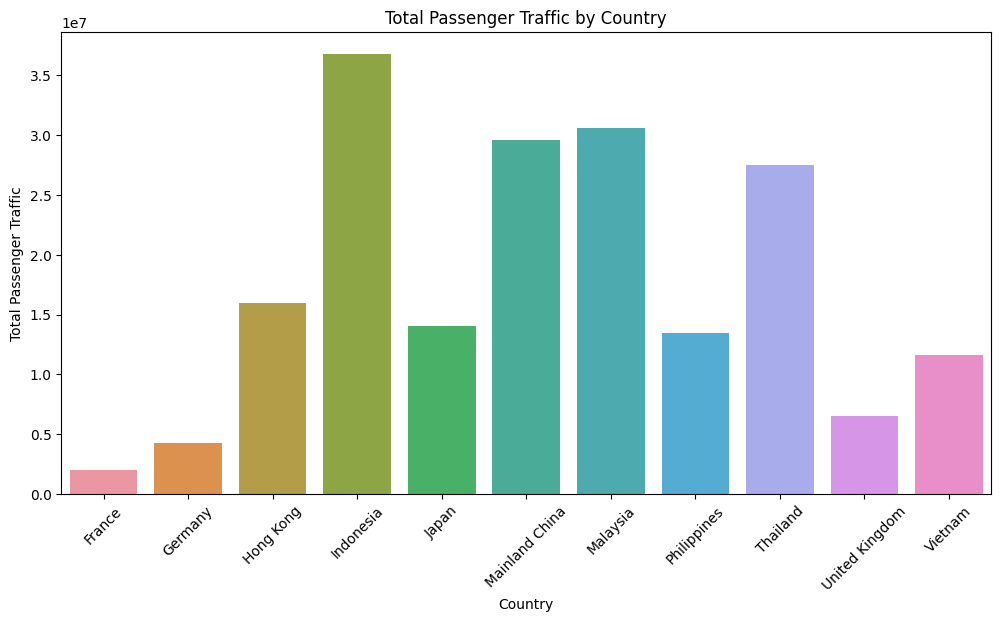

In [26]:
df['Total_Traffic'] = df['Arrivals'] + df['Departures']

plt.figure(figsize=(12,6))
sns.barplot(x=df.groupby('Country')['Total_Traffic'].sum().index, 
            y=df.groupby('Country')['Total_Traffic'].sum().values)
plt.title('Total Passenger Traffic by Country')
plt.xlabel('Country')
plt.ylabel('Total Passenger Traffic')
plt.xticks(rotation=45)
plt.show()

Impact of Holidays on Arrivals by Country

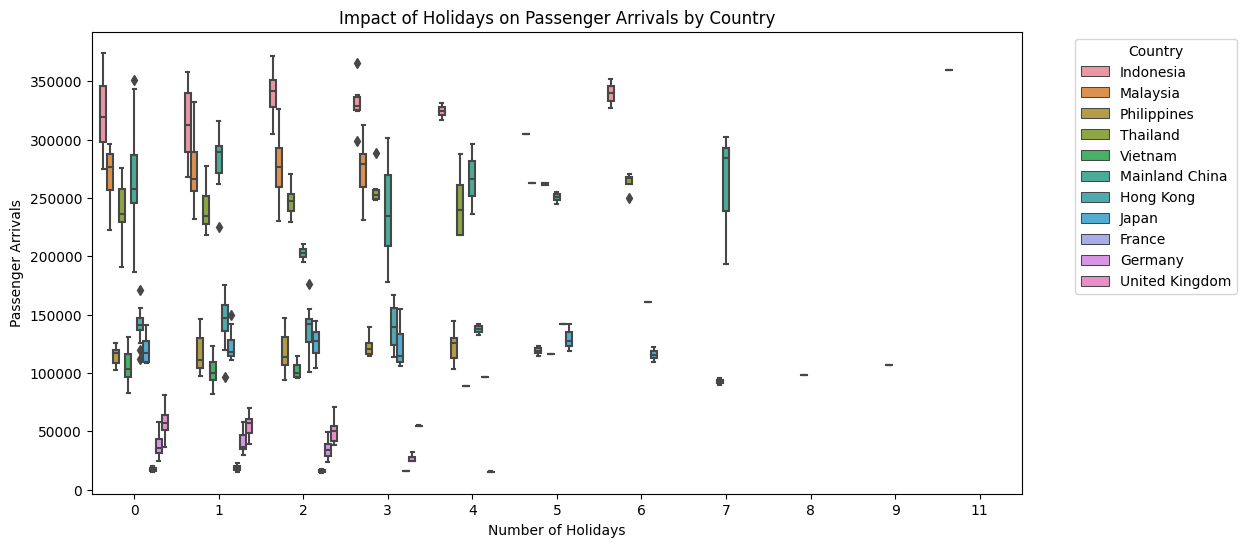

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['No of holidays'], y=df['Arrivals'], hue=df['Country'])
plt.title('Impact of Holidays on Passenger Arrivals by Country')
plt.xlabel('Number of Holidays')
plt.ylabel('Passenger Arrivals')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Country-wise Heatmap of Passenger Volume

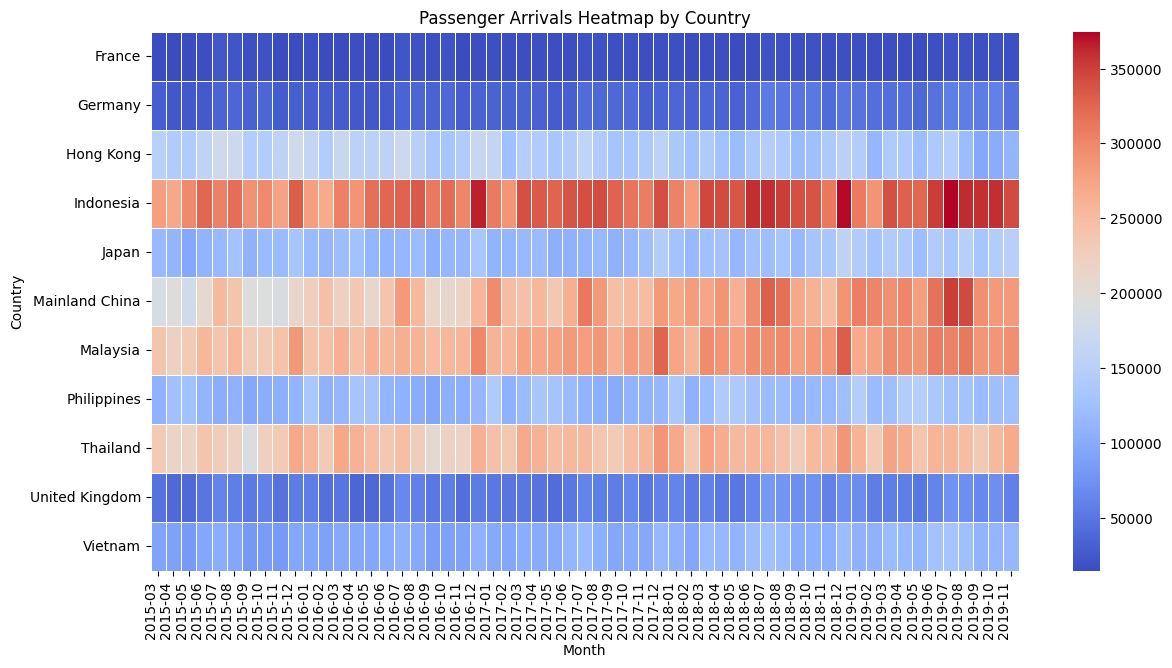

In [34]:
# Create pivot table
pivot_table = df.pivot_table(values='Arrivals', index='Country', columns='Month (YYYY-MM)', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(14,7))
ax = sns.heatmap(pivot_table, cmap='coolwarm', annot=False, linewidths=0.5)

# Fix x-axis labels
ax.set_xticklabels([x.strftime('%Y-%m') for x in pivot_table.columns], rotation=90, ha='right')

plt.title('Passenger Arrivals Heatmap by Country')
plt.xlabel('Month')
plt.ylabel('Country')
plt.show()